In [1]:
import os, sys
module_rootdir = '../..'
dataset_rootdir = '../../..'
label_rootdir = module_rootdir
weight_rootdir = module_rootdir
sys.path.append(module_rootdir)

from modules.first_stage.set_parameters_for_inference import set_param_for_inference
from modules.evaluation.plot_func import plot_roc, plot_precision_recall, compare_roc, compare_pr
from modules.evaluation.score_tuning import ROC_for_score_tuning, display_performance

In [2]:
weights_file = 'model_weights/1705990924432/anchor_free_detector.pt'

param_dict = set_param_for_inference(
    dataset_type = 'kitti',
    module_rootdir = module_rootdir,
    dataset_rootdir = dataset_rootdir,
    label_rootdir = label_rootdir,
    batch_size = 1,
    trained_weights_file = os.path.join(weight_rootdir, weights_file))

device = param_dict['device']
dataset_param = param_dict['dataset_param']
dataset_train = param_dict['dataset_train']
dataset_val = param_dict['dataset_val'] 
detector = param_dict['detector']

GPU is available. Good to go!
printing model config parameters
----------------------------------------------------------------------------------------------------
backbone                        : efficientnet_b4
num_backbone_nodes              : 4
num_extra_blocks                : 1
num_levels                      : 5
extra_blocks_feat_dim           : 512
num_fpn_blocks                  : 2
fpn_feat_dim                    : 128
prediction head stem_channels   : [128, 128, 128, 128]
activation                      : swish
image dimension BDD (H, W, D)   : (360, 640, 3)
image dimension KITTI (H, W, D) : (263, 873, 3)
num_classes                     : 2
DEVICE                          : cuda
****************************************************************************************************
 
Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0008
Sequence: 0009
Sequence: 0011
Sequence: 0012

In [3]:
dataset = dataset_val
gt_iou_thresh = 0.5
nms_thresh = 0.35
image_start_idx = 0
num_images = len(dataset_val)

generating detection rate & FP_per_image for score:  0.05
generating detection rate & FP_per_image for score:  0.1
generating detection rate & FP_per_image for score:  0.2
generating detection rate & FP_per_image for score:  0.3
generating detection rate & FP_per_image for score:  0.4
generating detection rate & FP_per_image for score:  0.5
generating detection rate & FP_per_image for score:  0.6
generating detection rate & FP_per_image for score:  0.7
generating detection rate & FP_per_image for score:  0.8
generating detection rate & FP_per_image for score:  0.9
generating detection rate & FP_per_image for score:  0.99


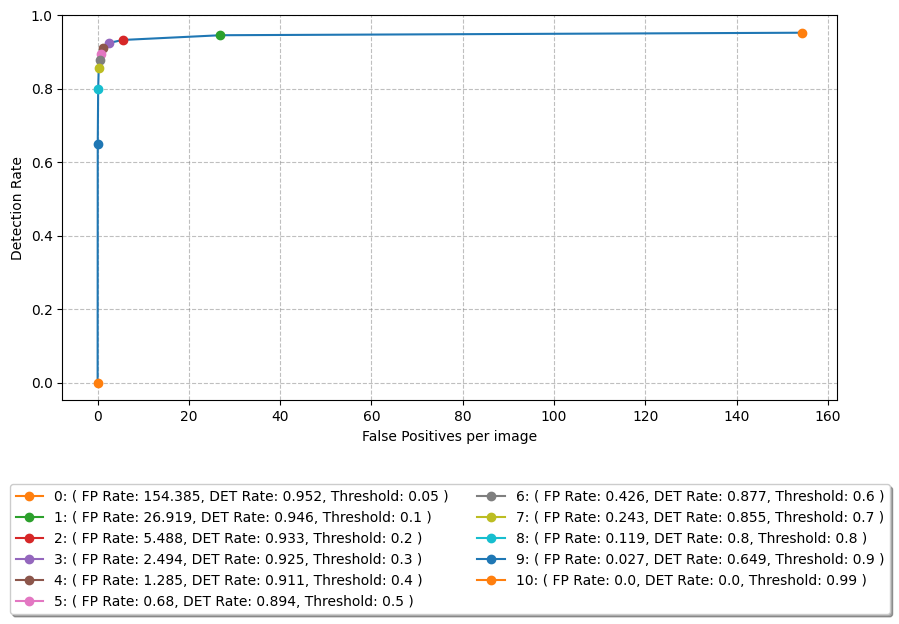

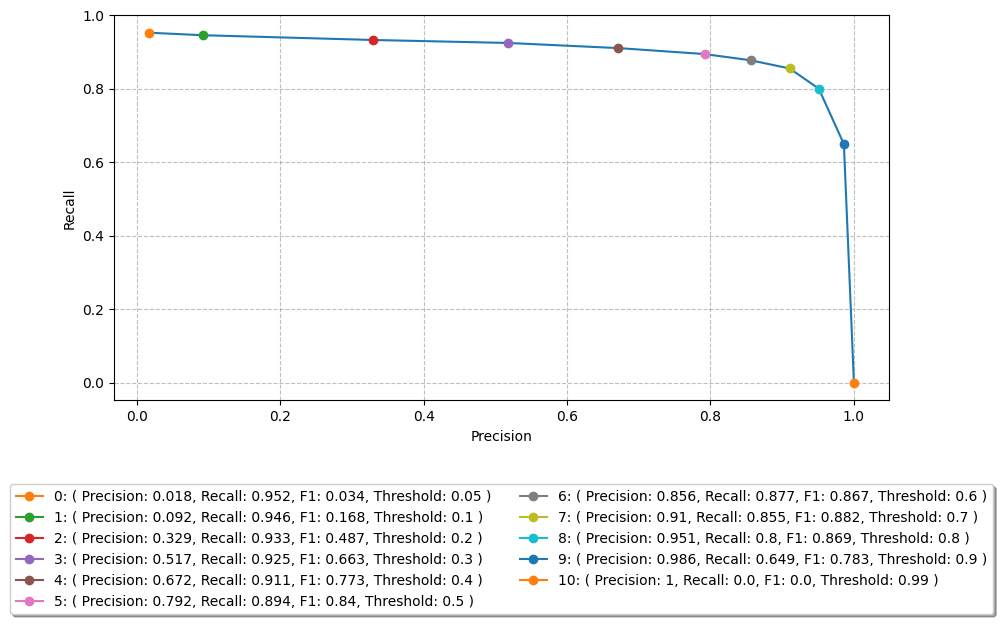

0: ( Threshold: 0.05, F1: 0.03437507275103681, DET Rate: 0.9524511610762993, FP Rate: 154.38477913783927 )
1: ( Threshold: 0.1, F1: 0.16785252792907732, DET Rate: 0.9456321415407298, FP Rate: 26.918573709419903 )
2: ( Threshold: 0.2, F1: 0.48665801240444256, DET Rate: 0.9327312937707335, FP Rate: 5.488025545502927 )
3: ( Threshold: 0.3, F1: 0.6631857237276935, DET Rate: 0.9246221894581644, FP Rate: 2.494411921234699 )
4: ( Threshold: 0.4, F1: 0.7731184478172429, DET Rate: 0.9106155547364541, FP Rate: 1.2852581160191592 )
5: ( Threshold: 0.5, F1: 0.8399100034614053, DET Rate: 0.8943973461113159, FP Rate: 0.6796168174560937 )
6: ( Threshold: 0.6, F1: 0.8665817255187478, DET Rate: 0.877441946185035, FP Rate: 0.4262905800957956 )
7: ( Threshold: 0.7, F1: 0.8818777915043239, DET Rate: 0.85514190932547, FP Rate: 0.24321447578499203 )
8: ( Threshold: 0.8, F1: 0.8692084459121385, DET Rate: 0.8004054552156284, FP Rate: 0.11921234699308142 )
9: ( Threshold: 0.9, F1: 0.7831111111111112, DET Rate:

In [4]:
selected_clssid = 0
SCORE_THRESH_class0, \
DETECTION_RATE_LIST_class0, \
FP_RATE_PER_IMAGE_LIST_class0, \
PRECISION_class0, RECALL_class0, F1_class0 \
    = ROC_for_score_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        selected_clssid = selected_clssid,
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        nms_thresh = nms_thresh, 
        device = device)

plot_roc(SCORE_THRESH_class0, FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, figsize=(10, 5))
plot_precision_recall(SCORE_THRESH_class0, F1_class0, PRECISION_class0, RECALL_class0, figsize=(10, 5))
display_performance(SCORE_THRESH_class0, DETECTION_RATE_LIST_class0, FP_RATE_PER_IMAGE_LIST_class0, F1_class0)

generating detection rate & FP_per_image for score:  0.05
generating detection rate & FP_per_image for score:  0.1
generating detection rate & FP_per_image for score:  0.2
generating detection rate & FP_per_image for score:  0.3
generating detection rate & FP_per_image for score:  0.4
generating detection rate & FP_per_image for score:  0.5
generating detection rate & FP_per_image for score:  0.6
generating detection rate & FP_per_image for score:  0.7
generating detection rate & FP_per_image for score:  0.8
generating detection rate & FP_per_image for score:  0.9
generating detection rate & FP_per_image for score:  0.99


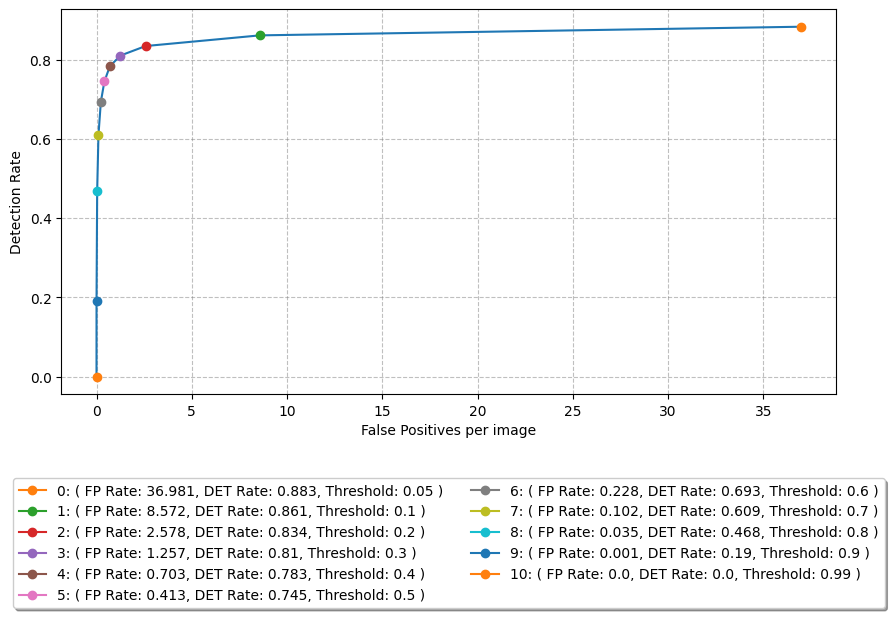

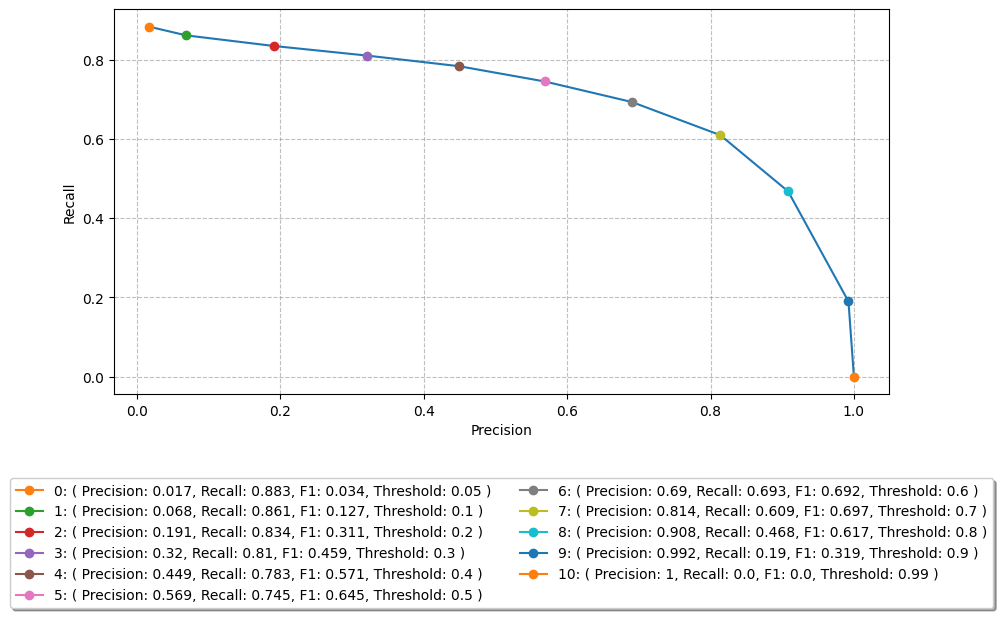

0: ( Threshold: 0.05, F1: 0.033686664076807815, DET Rate: 0.8829090909090909, FP Rate: 36.980840872804684 )
1: ( Threshold: 0.1, F1: 0.12686167363120113, DET Rate: 0.8610909090909091, FP Rate: 8.572112825971262 )
2: ( Threshold: 0.2, F1: 0.3113886249490973, DET Rate: 0.8341818181818181, FP Rate: 2.5784992017030337 )
3: ( Threshold: 0.3, F1: 0.4592867450010307, DET Rate: 0.8101818181818182, FP Rate: 1.2570516232038318 )
4: ( Threshold: 0.4, F1: 0.5710498409331919, DET Rate: 0.7832727272727272, FP Rate: 0.7025013304949441 )
5: ( Threshold: 0.5, F1: 0.6450393700787401, DET Rate: 0.7447272727272727, FP Rate: 0.41298563065460353 )
6: ( Threshold: 0.6, F1: 0.6915820029027576, DET Rate: 0.6930909090909091, FP Rate: 0.22778073443320915 )
7: ( Threshold: 0.7, F1: 0.6968814968814969, DET Rate: 0.6094545454545455, FP Rate: 0.1021820117083555 )
8: ( Threshold: 0.8, F1: 0.6173787806048967, DET Rate: 0.46763636363636363, FP Rate: 0.034592868547099524 )
9: ( Threshold: 0.9, F1: 0.3186813186813187, DE

In [5]:
selected_clssid = 1
SCORE_THRESH_class1, \
DETECTION_RATE_LIST_class1, \
FP_RATE_PER_IMAGE_LIST_class1, \
PRECISION_class1, RECALL_class1, F1_class1 \
    = ROC_for_score_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        selected_clssid = selected_clssid,
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        nms_thresh = nms_thresh, 
        device = device)

plot_roc(SCORE_THRESH_class1, FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, figsize=(10, 5))
plot_precision_recall(SCORE_THRESH_class1, F1_class1, PRECISION_class1, RECALL_class1, figsize=(10, 5))
display_performance(SCORE_THRESH_class1, DETECTION_RATE_LIST_class1, FP_RATE_PER_IMAGE_LIST_class1, F1_class1)

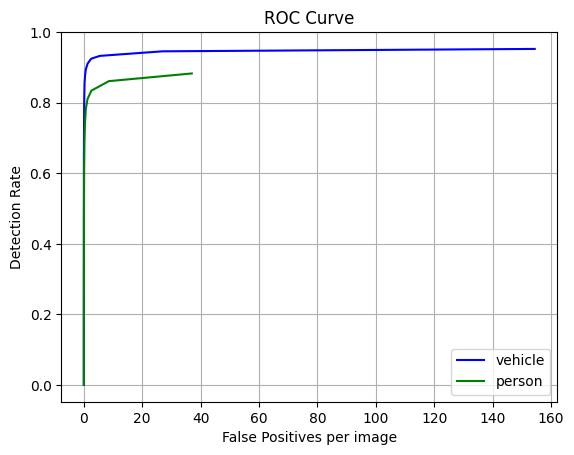

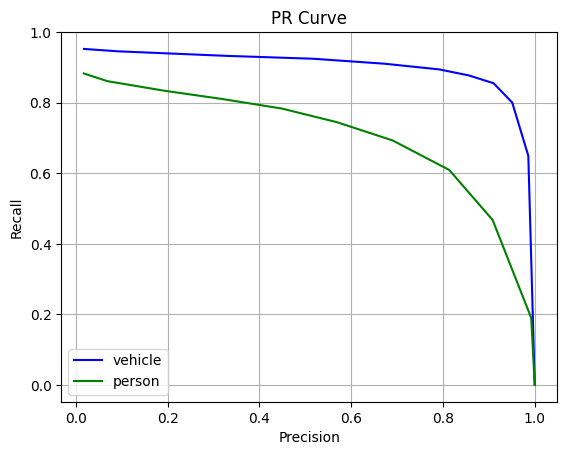

In [6]:
from modules.dataset_utils.kitti_dataset_utils.constants import _IDX_TO_OBJ_CLASS_

compare_roc(
    FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0,
    FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1,
    _IDX_TO_OBJ_CLASS_)

compare_pr(
    PRECISION_class0, RECALL_class0,
    PRECISION_class1, RECALL_class1,
    _IDX_TO_OBJ_CLASS_)